In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 

X = X.drop(columns=['ZSN_A'])

print(X.info())
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 110 entries, AGE to TRENT_S_n
dtypes: float64(109), int64(1)
memory usage: 1.4 MB
None


In [4]:
#Going to fill with the mean of each column, for simplicity sake
mean = X.mean()
X.fillna(mean, inplace=True)

In [5]:

print(X.isnull().any())

y_zsn = y["ZSN"].to_frame()
print(y_zsn.isnull().any())

AGE              False
SEX              False
INF_ANAM         False
STENOK_AN        False
FK_STENOK        False
IBS_POST         False
IBS_NASL         False
GB               False
SIM_GIPERT       False
DLIT_AG          False
nr_11            False
nr_01            False
nr_02            False
nr_03            False
nr_04            False
nr_07            False
nr_08            False
np_01            False
np_04            False
np_05            False
np_07            False
np_08            False
np_09            False
np_10            False
endocr_01        False
endocr_02        False
endocr_03        False
zab_leg_01       False
zab_leg_02       False
zab_leg_03       False
zab_leg_04       False
zab_leg_06       False
S_AD_KBRIG       False
D_AD_KBRIG       False
S_AD_ORIT        False
D_AD_ORIT        False
O_L_POST         False
K_SH_POST        False
MP_TP_POST       False
SVT_POST         False
GT_POST          False
FIB_G_POST       False
ant_im           False
lat_im     

In [6]:
import pandas as pd

# Combine features and target variable into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate Pearson correlation coefficients
correlation_matrix = data.corr().abs()

# Extract correlations with the target variable
feature_target_correlations = correlation_matrix['ZSN'].drop('ZSN')

# Print feature-target correlations
print("Feature-Target Correlations:")
print(feature_target_correlations)

Feature-Target Correlations:
AGE              0.145744
SEX              0.097490
INF_ANAM         0.017343
STENOK_AN        0.013826
FK_STENOK        0.005430
IBS_POST         0.013227
IBS_NASL         0.027984
GB               0.041670
SIM_GIPERT       0.001854
DLIT_AG          0.031831
nr_11            0.019708
nr_01            0.059449
nr_02            0.020742
nr_03            0.027771
nr_04            0.088604
nr_07            0.044072
nr_08            0.026871
np_01            0.021664
np_04            0.023282
np_05            0.024861
np_07            0.013434
np_08            0.032955
np_09            0.062331
np_10            0.043148
endocr_01        0.126115
endocr_02        0.028815
endocr_03        0.016496
zab_leg_01       0.113289
zab_leg_02       0.010368
zab_leg_03       0.023037
zab_leg_04       0.017497
zab_leg_06       0.001319
S_AD_KBRIG       0.041278
D_AD_KBRIG       0.033811
S_AD_ORIT        0.056190
D_AD_ORIT        0.047166
O_L_POST         0.008247
K_SH_POST

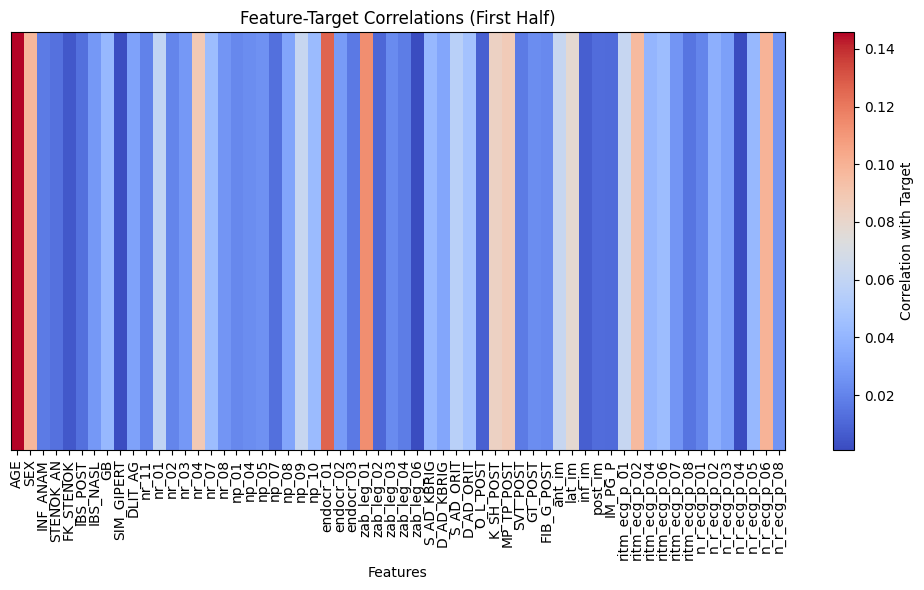

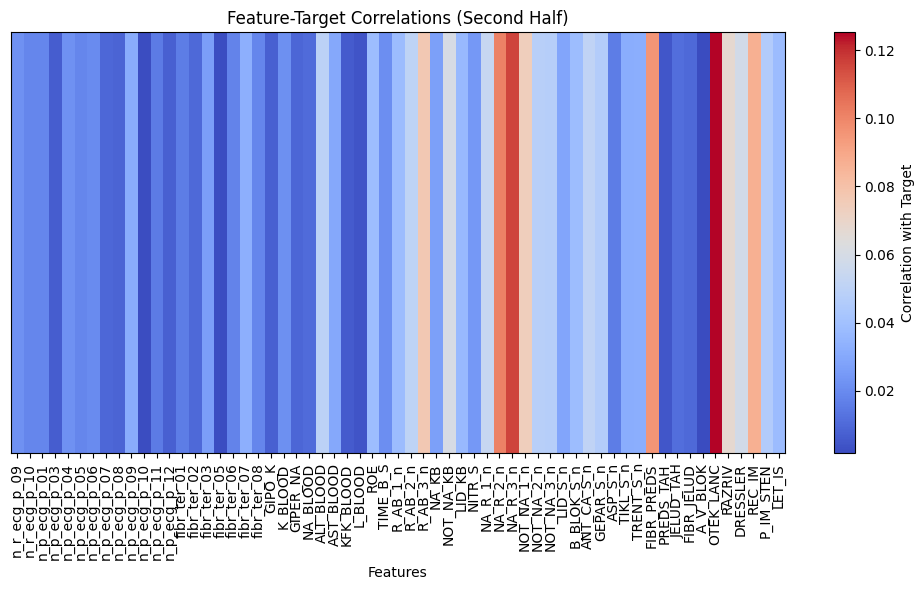

In [7]:
import matplotlib.pyplot as plt

# Split the feature-target correlations into two halves
num_features = len(feature_target_correlations)
half = num_features // 2
first_half = feature_target_correlations[:half]
second_half = feature_target_correlations[half:]

# Plot first half of feature-target correlations
plt.figure(figsize=(10, 6))
plt.imshow(first_half.values.reshape(1, -1), cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation with Target')
plt.title('Feature-Target Correlations (First Half)')
plt.xlabel('Features')
plt.xticks(ticks=np.arange(len(first_half)), labels=first_half.index, rotation=90)
plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot second half of feature-target correlations
plt.figure(figsize=(10, 6))
plt.imshow(second_half.values.reshape(1, -1), cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation with Target')
plt.title('Feature-Target Correlations (Second Half)')
plt.xlabel('Features')
plt.xticks(ticks=np.arange(len(second_half)), labels=second_half.index, rotation=90)
plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X_imputed = imputer.fit_transform(X)

# Normalize numerical features
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_zsn, test_size=0.2, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection (optional)
# Select the top k features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=20)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = gnb_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7794117647058824
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       260
           1       0.63      0.15      0.24        80

    accuracy                           0.78       340
   macro avg       0.71      0.56      0.56       340
weighted avg       0.75      0.78      0.72       340



c:\Users\sckdk\Documents\CS_4364\hw2_data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sckdk\Documents\CS_4364\hw2_data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


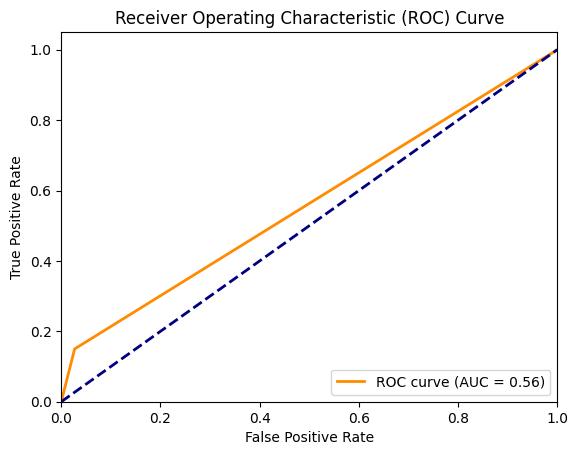

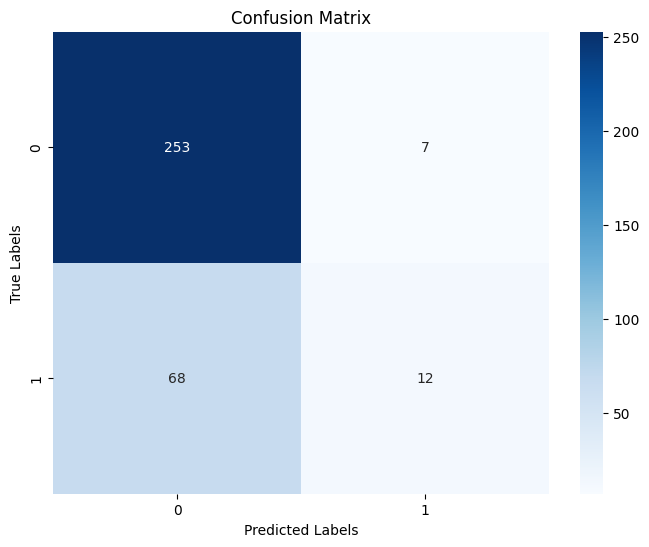

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_true' contains the true labels and 'y_scores' contains the predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()